This notebook deals with the matter of stitching the output files of unfinished simulations due to TIMEOUTS. It is strucutred in 2 parts:

- **PART 1**
We make a fake outputfile with the last two timesteps to use as a restart file for `backtrack_from_existing_file.py`.

- **PART 2**:
We stitch together part1 and part2 files of the simulations in question.

> This notebook is not generalized for all incomplete output. You need to modify it manually to get the outputs for the files you want to address.

In [7]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy

In [18]:
tt = xr.open_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/tests/restart23000file.zarr')

/nethome/6525954/.conda/envs/abyssal-nps/lib/python3.8/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/nethome/6525954/.conda/envs/abyssal-nps/lib/python3.8/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [8]:
sim = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/abyssal_nps_outputs/hc13_25000_BM_True.zarr')
sim = sim.compute()
sim = sim.dropna(dim='obs')

In [9]:
sim

<xarray.Dataset>
Dimensions:           (trajectory: 10000, obs: 2283)
Coordinates:
  * obs               (obs) int32 0 1 2 3 4 5 ... 2277 2278 2279 2280 2281 2282
  * trajectory        (trajectory) int64 0 1 2 3 4 ... 9995 9996 9997 9998 9999
Data variables: (12/20)
    abs_salinity      (trajectory, obs) float32 34.75 34.75 ... 34.72 34.72
    bottom            (trajectory, obs) float32 5.5e+03 5.5e+03 ... 5.052e+03
    cons_temperature  (trajectory, obs) float32 0.755 0.7429 ... 0.8622 0.872
    density           (trajectory, obs) float32 1.028e+03 ... 1.028e+03
    distance          (trajectory, obs) float32 51.0 51.0 51.0 ... 51.0 51.0
    floored           (trajectory, obs) float32 0.0 0.0 0.0 ... 24.0 24.0 24.0
    ...                ...
    u                 (trajectory, obs) float32 0.0 3.982e-07 ... 1.205e-07
    v                 (trajectory, obs) float32 0.0 -4.511e-07 ... -5.579e-08
    v_s               (trajectory, obs) float32 5.271e-10 ... 1.918e-08
    w                 (trajectory, obs) float32 0.0 -0.0002637 ... -0.0001317
    z                 (trajectory, obs) float64 5e+03 5.019e+03 ... 3.936e+03
    z_kz              (trajectory, obs) float32 0.0 1.685 ... -0.3398 -0.5245
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        2.4.2

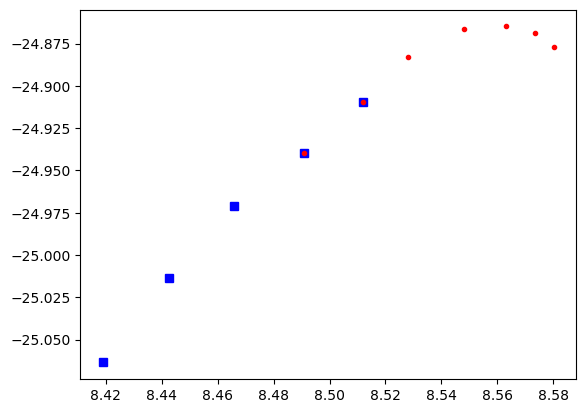

In [27]:
pp = 40
plt.plot(tt.lon[pp, :], tt.lat[pp, :], 'bs')
plt.plot(sim.lon[pp,-7:], sim.lat[pp,-7:], 'r.')

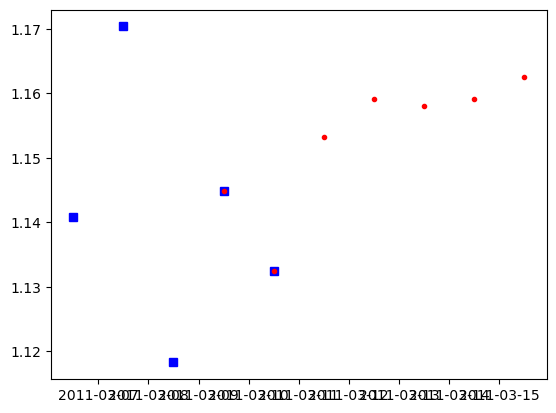

In [37]:
pp = 40
plt.plot(tt.time[pp, :], tt.cons_temperature[pp, :], 'bs')
plt.plot(sim.time[pp, -7:], sim.cons_temperature[pp,-7:], 'r.')

In [12]:
sim

<xarray.Dataset>
Dimensions:           (trajectory: 8192, obs: 2875)
Coordinates:
  * obs               (obs) int32 0 1 2 3 4 5 ... 2869 2870 2871 2872 2873 2874
  * trajectory        (trajectory) int64 0 1 2 3 4 ... 8187 8188 8189 8190 8191
Data variables: (12/20)
    abs_salinity      (trajectory, obs) float32 34.75 34.75 ... 34.72 34.72
    bottom            (trajectory, obs) float32 5.5e+03 5.5e+03 ... 5.052e+03
    cons_temperature  (trajectory, obs) float32 0.755 0.7429 ... 0.4315 0.4132
    density           (trajectory, obs) float32 1.028e+03 ... 1.028e+03
    distance          (trajectory, obs) float32 51.0 51.0 51.0 ... 51.0 51.0
    floored           (trajectory, obs) float32 0.0 0.0 0.0 ... 77.0 77.0 77.0
    ...                ...
    u                 (trajectory, obs) float32 0.0 3.982e-07 ... -2.242e-07
    v                 (trajectory, obs) float32 0.0 -4.395e-07 ... 7.65e-07
    v_s               (trajectory, obs) float32 8.861e-08 ... 3.976e-08
    w                 (trajectory, obs) float32 0.0 -0.0002636 ... -0.0003031
    z                 (trajectory, obs) float64 5e+03 5.019e+03 ... 4.575e+03
    z_kz              (trajectory, obs) float32 0.0 1.721 ... -0.4716 0.4672
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        2.4.2

In [10]:
# select the last obs and create a new dataset with the last two obs
sim_last = sim.isel(obs=[-2,-1])

In [11]:
sim_last

<xarray.Dataset>
Dimensions:           (trajectory: 10000, obs: 2)
Coordinates:
  * obs               (obs) int32 2281 2282
  * trajectory        (trajectory) int64 0 1 2 3 4 ... 9995 9996 9997 9998 9999
Data variables: (12/20)
    abs_salinity      (trajectory, obs) float32 34.73 34.73 ... 34.72 34.72
    bottom            (trajectory, obs) float32 5.5e+03 5.5e+03 ... 5.052e+03
    cons_temperature  (trajectory, obs) float32 0.5941 0.589 ... 0.8622 0.872
    density           (trajectory, obs) float32 1.028e+03 ... 1.028e+03
    distance          (trajectory, obs) float32 51.0 51.0 51.0 ... 51.0 51.0
    floored           (trajectory, obs) float32 42.0 42.0 24.0 ... 24.0 24.0
    ...                ...
    u                 (trajectory, obs) float32 2.926e-07 ... 1.205e-07
    v                 (trajectory, obs) float32 -5.019e-07 ... -5.579e-08
    v_s               (trajectory, obs) float32 5.27e-10 5.27e-10 ... 1.918e-08
    w                 (trajectory, obs) float32 -1.333e-05 ... -0.0001317
    z                 (trajectory, obs) float64 5.147e+03 ... 3.936e+03
    z_kz              (trajectory, obs) float32 0.1803 0.7113 ... -0.5245
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        2.4.2

In [13]:
sim_last.to_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/abyssal_nps_outputs/hc13_25000_BM_False_lasttwo.zarr')

In [15]:
sim_last.time[0]

<xarray.DataArray 'time' (obs: 2)>
array(['2012-10-22T12:00:00.000000000', '2012-10-21T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * obs         (obs) int32 2281 2282
    trajectory  int64 0
Attributes:
    axis:           T
    long_name:      
    standard_name:  time

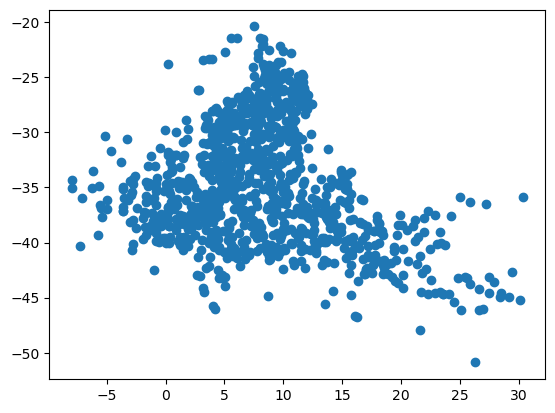

In [12]:
plt.scatter(sim_last.lon[:1000, 1], sim_last.lat[:1000, 1])

In [25]:
sim.time[0, -1].values

numpy.datetime64('2011-03-09T12:00:00.000000000')

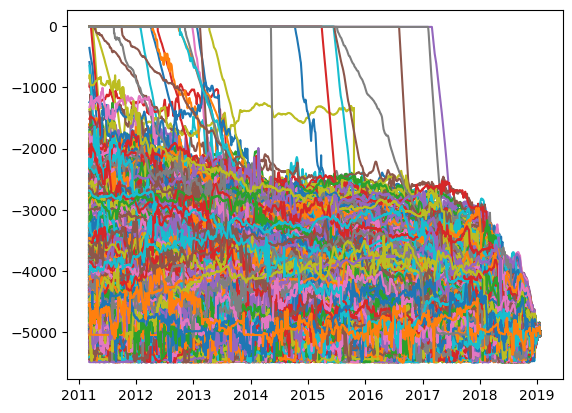

In [24]:
for i in range(0, 8192):
    plt.plot(sim.time[i,:], -sim['z'][i,:])


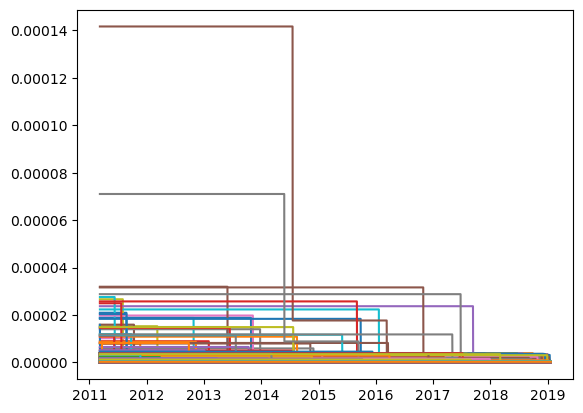

In [19]:
for i in range(0, 8192):
    plt.plot(sim.time[i,:], sim['radius'][i,:])

100%|██████████| 100/100 [00:01<00:00, 52.03it/s]


(-30.0, 180.0)

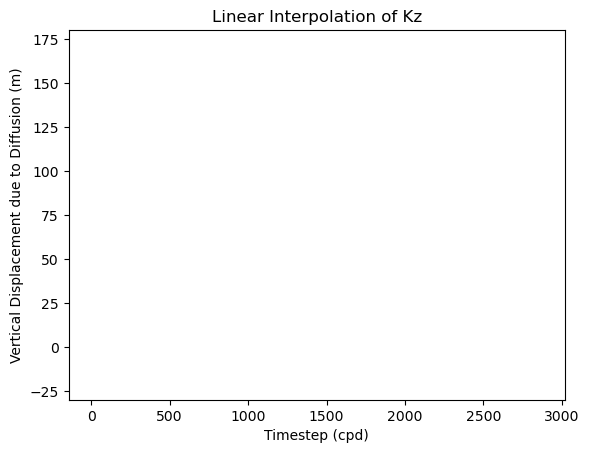

In [8]:
for i in tqdm(range(0, 100, 1)):
    plt.plot(sim.z[i,:], 'k', linewidth=0.5)
    
plt.ylabel('Vertical Displacement due to Diffusion (m)')
plt.xlabel('Timestep (cpd)')
plt.title('Linear Interpolation of Kz')

plt.ylim(-30,180)

In [10]:
sim2 = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/hc13_2/hc13_0.zarr/')
sim2 = sim2.compute()

100%|██████████| 100/100 [00:00<00:00, 892.81it/s]


(-30.0, 180.0)

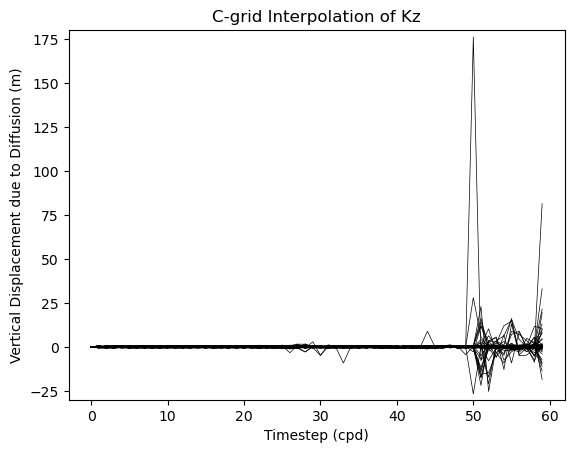

In [23]:
for i in tqdm(range(0, 100, 1)):
    plt.plot(sim2.z_kz[i,:60], 'k', linewidth=0.5)

plt.ylabel('Vertical Displacement due to Diffusion (m)')
plt.xlabel('Timestep (cpd)')
plt.title('C-grid Interpolation of Kz')
plt.ylim(-30,180)

## Filter function

In [14]:
def filter_trajectories(data, condition):
    k, _ = np.where(condition)
    index = np.unique(k)
    
    data_relevant = data.where(data['trajectory'].isin(index), drop=True)

    return data_relevant

In [15]:
sim_surface = filter_trajectories(sim, sim['z']<10)

In [16]:
sim_surface

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 4856)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float32 1.0 1.0 1.0 1.0 ... nan nan nan nan
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

## Continental shelf

In [17]:
shelf = filter_trajectories(sim, sim['seafloor'] < 200)

In [18]:
sim

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 4860)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float32 1.0 1.0 1.0 1.0 ... nan nan nan nan
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

In [19]:
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei

depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r',n_colors=8)
cmap   = sns.mpl_palette('cmo.ice',n_colors=8,as_cmap=True)

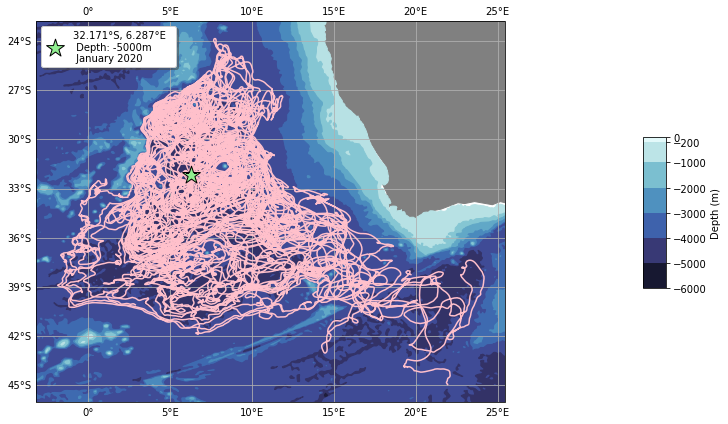

In [9]:
max_depth = -5500
min_depth = 0 

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5000m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
# frame = -1
# ax.plot(sim['lon'][8372,:], sim['lat'][8372,:], zorder=4, c='yellow')
# ax.scatter(shelf['lon'][:,:], shelf['lat'][:,:], zorder=5, c='red')
# ax.scatter(sim['lon'][8372,-10], sim['lat'][8372,-10], zorder=5, c='red')

# for t in range(shelf.dims['traj']):
#     ax.plot(shelf['lon'][t,:], shelf['lat'][t,:], c='pink')
#     ax.scatter(shelf['lon'][t,-1], shelf['lat'][t,-1], c='red', zorder=5)

for t in range(10):
    ax.plot(sim['lon'][t,:], sim['lat'][t,:], c='pink')
    ax.scatter(sim['lon'][t,-1], sim['lat'][t,-1], c='red', zorder=5)
    
    
# bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.03])
# fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle diameter (m)')
# ax.set_title('10 years before sampling', fontsize=15, weight='bold')
# plt.savefig('../figs/revers.png')

In [10]:
frame= 1700

plt.bar(shelf['lon'][:,frame], shelf['seafloor'][:,frame]-shelf['z'][:,frame] ,bottom=-shelf['seafloor'][:,frame], color='blue')
plt.scatter(shelf['lon'][:,frame], -shelf['z'][:,frame], color='red', zorder=4)

IndexError: index 1700 is out of bounds for axis 1 with size 0

In [ ]:
max_depth = -6000
min_depth = 0 

fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(8, 2), height_ratios=(8, 2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)

i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.78,0.4,0.025,0.4])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5000m \n January 2020', 
           s=350, edgecolors='black')

# {shelf['time'][0, frame].values}
ax.set_title(f'-{frame} days')

frame = 1620
window = 30
if frame - window < 0:
    shadow = 0
    trail = frame
    
else:
    shadow = frame - window
    trail = window
    

im = ax.scatter(shelf['lon'][:,shadow:frame].T, shelf['lat'][:,shadow:frame].T, 
           c=-shelf['z'][:,shadow:frame].T, zorder=5, s=np.array([np.linspace(1, 41, trail)]*8).T, 
                cmap='OrRd',
               vmax=0, vmin=-5500)

im2 = ax.scatter(shelf['lon'][:,frame], shelf['lat'][:,frame], 
                c=shelf['diameter'][:,frame]*1000, 
                zorder=5, cmap='spring', norm=matplotlib.colors.LogNorm(),
               vmax=1e-2, vmin=1e-5, marker='s')

bar_ax = fig.add_axes([0.1, 0.18, 0.3, 0.03])
fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle depth (m)')

bar_ax2 = fig.add_axes([0.45, 0.18, 0.3, 0.03])
fig.colorbar(im2, cax=bar_ax2, orientation='horizontal', label='Particle diameter (mm)')
# ax.set_title('10 years before sampling', fontsize=15, weight='bold')
# plt.savefig('../figs/snapzhotz.png')

### Nanoparticles

In [10]:
nano = sim.where(sim.diameter < 1e-6, drop=True)

In [11]:
nano

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 4856)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... 1.226e-05
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... 34.79 34.79
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... 1.297 1.298
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... 1.028e+03
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 ... 1.017e-07
    in_motion         (traj, obs) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... 2.168e-08
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... 1.367e-07
    v_s               (traj, obs) float32 0.0 4.756e-10 ... 1.93e-09 1.93e-09
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... 2.511e-05
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... 4.164e+03
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

In [12]:
bins =  np.linspace(-5200, 0, 53)

In [1]:
w = xr.load_dataset('/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/psy4v3r1-daily_W_2021-11-27.nc')

NameError: name 'xr' is not defined

In [13]:
time = sim['time'][0,:4856]#np.linspace(0, 4855, 4856)

In [14]:
time

<xarray.DataArray 'time' (obs: 4856)>
array(['2020-01-30T12:00:00.000000000', '2020-01-29T12:00:00.000000000',
       '2020-01-28T12:00:00.000000000', ...,
       '2006-10-17T12:00:00.000000000', '2006-10-16T12:00:00.000000000',
       '2006-10-15T12:00:00.000000000'], dtype='datetime64[ns]')
Dimensions without coordinates: obs
Attributes:
    axis:           T
    long_name:      
    standard_name:  time

In [15]:
sim['time'][0,:4856]

<xarray.DataArray 'time' (obs: 4856)>
array(['2020-01-30T12:00:00.000000000', '2020-01-29T12:00:00.000000000',
       '2020-01-28T12:00:00.000000000', ...,
       '2006-10-17T12:00:00.000000000', '2006-10-16T12:00:00.000000000',
       '2006-10-15T12:00:00.000000000'], dtype='datetime64[ns]')
Dimensions without coordinates: obs
Attributes:
    axis:           T
    long_name:      
    standard_name:  time

In [17]:
statz = {}
counts = {}
dist = {}
time_dim = 4856


for ft in tqdm([500,5000, 50000]):
    print(ft)
    sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_17/set17_{ft}.zarr')
    sim = sim.compute()
    nano = sim.where(sim.diameter < 1e-6, drop=True)
    hist_counts = np.zeros((52, time_dim))

    for i, fr in enumerate(range(0, time_dim, 1)):
    #     print(i)

        x = plt.hist(-nano['z'][:,fr].dropna('traj'), bins=bins, label = fr, density=False)
        hist_counts[:, i] = x[0]
        plt.close()
        

    total_particles = np.sum(hist_counts, axis=0)
    statz[ft] = hist_counts
    counts[ft] = total_particles


  0%|                                                                                 | 0/3 [00:00<?, ?it/s]

500


 33%|████████████████████████                                                | 1/3 [04:09<08:18, 249.45s/it]

5000


 67%|████████████████████████████████████████████████                        | 2/3 [08:21<04:10, 250.85s/it]

50000


100%|████████████████████████████████████████████████████████████████████████| 3/3 [12:54<00:00, 258.11s/it]


In [12]:
# no_fragmentation

time_dim = 4856

sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/parent/parent_multi_IC.zarr/')
nano = sim.compute()
hist_counts = np.zeros((52, time_dim))

for i, fr in enumerate(range(0, time_dim, 1)):
    x = plt.hist(-nano['z'][:,fr], bins=bins, label = fr, density=False)
    hist_counts[:, i] = x[0]
    plt.close()

    total_particles = np.sum(hist_counts, axis=0)
    ft = 'no_frag'
    
statz[ft] = hist_counts
counts[ft] = total_particles
    

In [272]:
sim['z'][:,0]

<xarray.DataArray 'z' (traj: 10000)>
array([5100., 5100., 5100., ..., 5100., 5100., 5100.])
Dimensions without coordinates: traj
Attributes:
    long_name:      
    positive:       down
    standard_name:  depth
    units:          m

In [286]:
k = np.where(sim['z'][:,-10] < 50)[0]

In [16]:
sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_17/set17_500.zarr')
sim = sim.compute()

k = np.where(sim['z'][:,-10] < 50)[0]
size_dist_500, binss = np.histogram(sim['diameter'][k,-10]*1000, bins=np.logspace(-3, 3, 14))


sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_17/set17_50.zarr')
sim = sim.compute()

k = np.where(sim['z'][:,1500] < 50)[0]
size_dist_50, binss = np.histogram(sim['diameter'][k,-10]*1000, bins=np.logspace(-3, 3, 14))


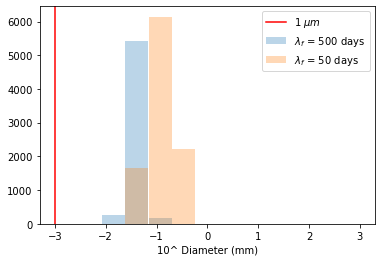

In [41]:
plt.bar(np.log10(binss[0:-1]), size_dist_500, align='edge', alpha=0.3, label=r'$\lambda_f$ = 500 days', width=0.45)
plt.bar(np.log10(binss[0:-1]), size_dist_50, align='edge', alpha=0.3, label=r'$\lambda_f$ = 50 days', width=0.45)

plt.axvline(-3, label=r"1 $\mu m$", color='red')
plt.xlabel('10^ Diameter (mm)')
plt.legend()
#

In [281]:
inMLD = {}


for ft in tqdm([500]):
    sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_17/set17_{ft}.zarr')
    sim = sim.compute()
    aux = np.array(sim['mld'] > sim['z'])
    aux = np.sum(aux, axis=0)

    inMLD[ft] = aux



100%|█████████████████████████████████████████████| 1/1 [00:18<00:00, 18.10s/it]


In [18]:
for ft in [50, 500, 5000, 50000]:
    plt.plot(time[:-6], inMLD[ft][:-10], label=ft)
    
plt.ylabel('Number of particles')
plt.xlabel('Time')
plt.title('Particles at Surface')
plt.legend()

NameError: name 'inMLD' is not defined

In [19]:
# <50 frag timescale

time_dim = 4856
ft = 50
sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_17/set17_{ft}.zarr')
sim = sim.compute()
nano = sim.where(sim.diameter < 1e-6, drop=True)
hist_counts = np.zeros((52, time_dim))

for i, fr in enumerate(range(0, 898, 1)):
    x = np.histogram(-nano['z'][:,fr].dropna('traj'), bins=bins,  density=False)
    hist_counts[:, i] = x[0]
#     plt.close()

    total_particles = np.sum(hist_counts, axis=0)
    
statz[ft] = hist_counts
counts[ft] = total_particles
    

/tmp/ipykernel_15005/2686824107.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[1].pcolormesh(x, y, b/counts[50], cmap=color_map, vmin = 0, vmax=0.2)
/tmp/ipykernel_15005/2686824107.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[2].pcolormesh(x, y, a/counts[500], cmap=color_map, vmin = 0, vmax=0.2)
/tmp/ipykernel_15005/2686824107.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is dep

Text(0.5, 1.0, 'Nanoparticles (50-1000 $nm$) in the water column')

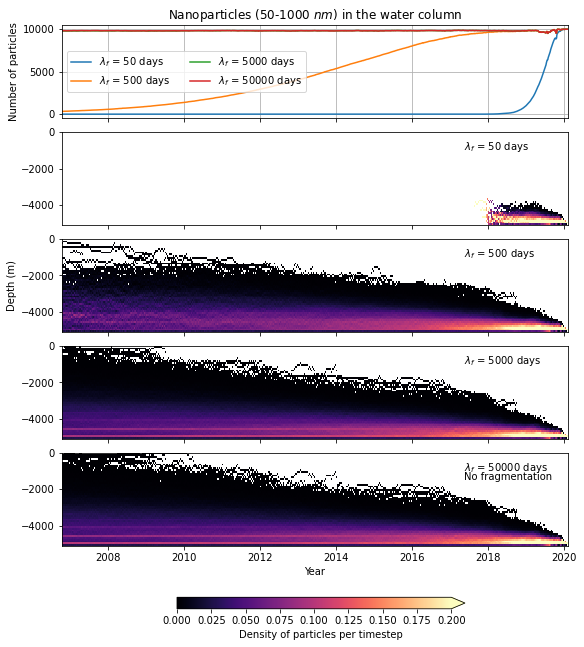

In [20]:
x, y = np.meshgrid(time, bins[1:])

fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(8, 8),
                       sharex=True, constrained_layout=True)

for ft in [50, 500, 5000, 50000]:
    ax[0].plot(time, counts[ft],label=f'$\lambda_f$ = {ft} days')
ax[0].legend(ncol=2, loc='center left')
    
ax[0].set_ylabel('Number of particles')
# ax[1].set_ylabel('Number of particles')  
ax[2].set_ylabel('Depth (m)')  
ax[4].set_xlabel('Year') 
ax[0].grid()

color_map = 'magma'

b = np.ma.masked_equal(statz[50], 0)
im1 = ax[1].pcolormesh(x, y, b/counts[50], cmap=color_map, vmin = 0, vmax=0.2)
ax[1].text(17300, -1000, '$\lambda_f$ = 50 days')

a = np.ma.masked_equal(statz[500], 0)
im1 = ax[2].pcolormesh(x, y, a/counts[500], cmap=color_map, vmin = 0, vmax=0.2)
ax[2].text(17300, -1000, '$\lambda_f$ = 500 days')

# b = np.ma.masked_equal(statz[2500], 0)
# im2= ax[2].pcolormesh(x, y, b/counts[2500], cmap=color_map, vmin = 0, vmax=0.2)
# ax[2].text(17300, -1000, '$\lambda_f$ = 2500 days')


c = np.ma.masked_equal(statz[5000], 0)
im3 = ax[3].pcolormesh(x, y, c/counts[5000], cmap=color_map, vmin = 0, vmax=0.2)
ax[3].text(17300, -1000, '$\lambda_f$ = 5000 days')

d = np.ma.masked_equal(statz[50000], 0)
im4 = ax[4].pcolormesh(x, y, d/counts[50000], cmap=color_map, vmin = 0, vmax=0.2)
ax[4].text(17300, -1000, '$\lambda_f$ = 50000 days')
ax[4].text(17300, -1500, 'No fragmentation')

bar_ax = fig.add_axes([0.3, -0.05, 0.5, 0.02])
# ax[5].axis('off')
cbar = fig.colorbar(im3, cax=bar_ax, orientation='horizontal',extend='max', label='Density of particles per timestep')
# ax[0].pcolormesh(x, y, -hist_counts, cmap='viridis')
ax[0].set_title('Nanoparticles (50-1000 $nm$) in the water column')
# plt.savefig('../figs/frag_t_Vdist_nano.png', dpi=300)

In [21]:
big_dist = {}
for ft in [500,5000, 50000]:
    dist = {}
    for i in [7, 11,15, 19]:
        date = np.datetime64(f'20{i:02d}-12-31 12:00')
        year = f'20{(i+1):02d}'#np.datetime_as_string(date, unit='Y')
        a = np.where(x[0] == date)[0][0]

        dist[year] = statz[ft][:,a]
        
    big_dist[ft] = dist
    

In [22]:
f = stats.gaussian_kde(big_dist[ft]['2008'])

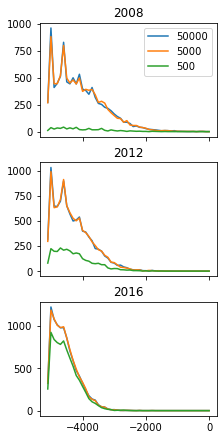

In [23]:
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(3, 6),
                       sharex=True, constrained_layout=True)
x_data = y[:,0]

for ft in [50000 ,5000, 500]:
    for i, year in enumerate(['2008', '2012', '2016']):
#     f = stats.gaussian_kde(big_dist[ft]['2008'])
        ax[i].plot(x_data, big_dist[ft][year], label=ft)
        ax[i].set_title(year)
        ax[0].legend()


# Distance from sampling location

In [24]:
def haversine_distance_two(point_A, point_B):
    """Calculates the great circle distance between two points
    on the Earth.
    Parameters
    ----------
    point_A: tuple
        containing the (latitude, longitude) in decimal degrees coordinates of
        point A.
    point_B: tuple
        containing the (latitude, longitude) in decimal degrees coordinates of
        point B.
    Returns
    -------
    km: float
        the distance in km between point A and point B
    """
    lat1, lon1 = point_A
    lat2, lon2 = point_B
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


In [26]:
nano

<xarray.Dataset>
Dimensions:           (traj: 10000, obs: 898)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    Kz                (traj, obs) float32 5.271e-05 6.009e-05 ... nan nan
    abs_salinity      (traj, obs) float32 34.74 34.74 34.74 ... nan nan nan
    cons_temperature  (traj, obs) float32 0.7279 0.7254 0.7221 ... nan nan nan
    density           (traj, obs) float32 1.028e+03 1.028e+03 ... nan nan
    diameter          (traj, obs) float64 5.05e-08 5.05e-08 5.05e-08 ... nan nan
    in_motion         (traj, obs) float64 1.0 1.0 1.0 1.0 ... nan nan nan nan
    ...                ...
    u                 (traj, obs) float32 4.618e-07 4.043e-07 ... nan nan
    v                 (traj, obs) float32 -5.266e-07 -3.972e-07 ... nan nan
    v_s               (traj, obs) float32 0.0 4.756e-10 4.756e-10 ... nan nan
    w                 (traj, obs) float32 2.774e-05 -0.0003397 ... nan nan
    w_k               (traj, obs) float32 0.0 0.0 0.0 0.0 ... nan nan nan nan
    z                 (traj, obs) float64 5.1e+03 5.119e+03 ... nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.3.0-303-gd31c5f32

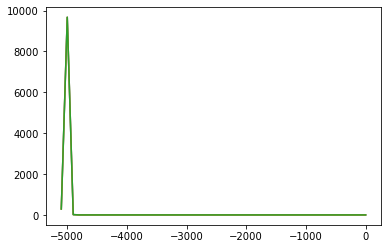

In [181]:
x_data = y[:,0]

for ft in [50000 ,5000, 500]:
#     f = stats.gaussian_kde(big_dist[ft]['2008'])
    plt.plot(x_data, big_dist[ft]['2020'])

In [104]:
dist['2008'].shape

(52,)

In [24]:
statz[500][0:10]

array([[0.000e+00, 9.990e+03, 9.631e+03, ..., 6.000e+00, 6.000e+00,
        7.000e+00],
       [1.000e+04, 1.000e+01, 3.690e+02, ..., 1.700e+01, 1.900e+01,
        1.800e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.200e+01, 1.000e+01,
        9.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.600e+01, 2.700e+01,
        2.600e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.800e+01, 1.700e+01,
        1.700e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.400e+01, 1.500e+01,
        1.400e+01]])

0 5000
1 2500
2 500


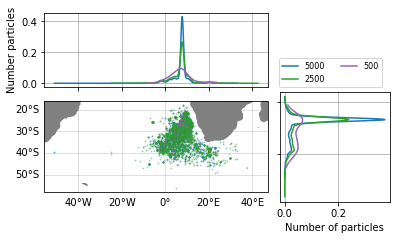

In [29]:
frame = 0
n_day = 360

fig = plt.figure()
gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
# ax.set_extent((-45, 46, -52, -16))
ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax_lon = plt.subplot(gs[0, 0], sharex=ax)
ax_lon.grid()
ax_lon.set_xticklabels([])
ax_lon.set_ylabel('Number particles')
# ax_lon.set_ylim(-5000, 0)

ax_lat = plt.subplot(gs[1, 1], sharey=ax)
ax_lat.grid()
ax_lat.set_yticklabels([])
ax_lat.set_xlabel('Number of particles')


ax_void = plt.subplot(gs[0, 1], sharey=ax)
ax_void.axis('off')


size_point = 0.7
frame = -1

frag_times = [5000, 2500, 500]

colormap='tab10'
x_colors = np.linspace(0, 0.4, len(frag_times))
colors = cm.get_cmap(colormap)(x_colors)

for i, ft in enumerate(frag_times):
    print(i, ft)
    sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_15/set15_{ft}.zarr/')
    suf = sim.where(sim.diameter < 1e-6, drop=True)
    
    xmin = suf['lon'][:,-1].dropna(dim='traj').min().values
    xmax = suf['lon'][:,-1].dropna(dim='traj').max().values
    ymin = suf['lat'][:,-1].dropna(dim='traj').min().values
    ymax = suf['lat'][:,-1].dropna(dim='traj').max().values
    x_range = np.linspace(xmin, xmax, 500)
    y_range = np.linspace(ymin, ymax, 500)
    
    kernel_lon = stats.gaussian_kde(suf['lon'][:,-1].dropna(dim='traj'))
    kernel_lat = stats.gaussian_kde(suf['lat'][:,-1].dropna(dim='traj'))
    
    kde_lon = kernel_lon(x_range)
    kde_lat = kernel_lat(y_range)
    
    n_surf_part = suf['lon'][:,-1].dropna(dim='traj').shape[0]
    
    ax.scatter(suf['lon'][:,frame], suf['lat'][:,frame], color=colors[i], zorder=4, s=1, alpha=0.3)

    ax_lon.plot(x_range, kde_lon, color=colors[i], label=ft)
    ax_lat.plot(kde_lat, y_range, color=colors[i])
    
ax_lon.legend(loc=(1.05, 0.), ncol=2, fontsize=8)

plt.savefig('../figs/frag_t_Hdist_nano.png', dpi=300)

## all particles

In [ ]:
time = np.linspace(0, 3650, 3651)

/tmp/ipykernel_209784/3803715408.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[1].pcolormesh(x, y, a/counts_all[500], cmap='jet')
/tmp/ipykernel_209784/3803715408.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2= ax[2].pcolormesh(x, y, b/counts_all[2500], cmap='jet')
/tmp/ipykernel_209784/3803715408.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify t

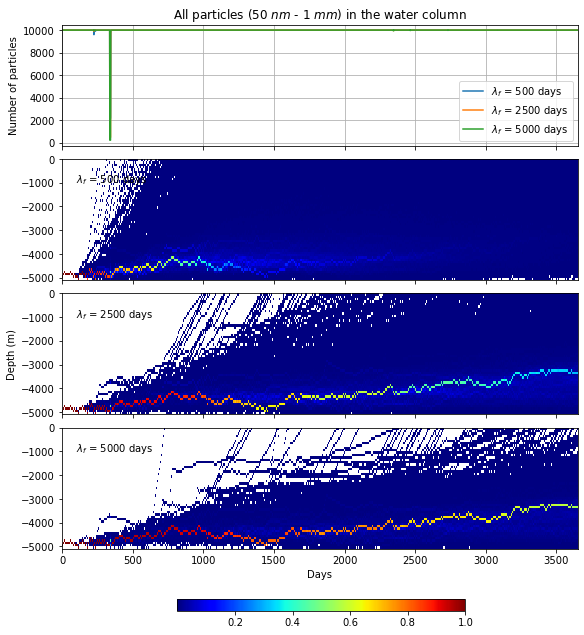

In [96]:
x, y = np.meshgrid(time, bins[1:])

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(8, 8),
                       sharex=True, constrained_layout=True)

for ft in [500, 2500, 5000]:
    ax[0].plot(time, counts_all[ft],label=f'$\lambda_f$ = {ft} days')
    ax[0].legend()
    

ax[0].set_ylabel('Number of particles')
# ax[1].set_ylabel('Number of particles')  
ax[2].set_ylabel('Depth (m)')  
ax[3].set_xlabel('Days') 

ax[0].grid()

# plt.text()
a = np.ma.masked_equal(statz_all[500], 0)
im1 = ax[1].pcolormesh(x, y, a/counts_all[500], cmap='jet')
ax[1].text(100, -1000, '$\lambda_f$ = 500 days')

b = np.ma.masked_equal(statz_all[2500], 0)
im2= ax[2].pcolormesh(x, y, b/counts_all[2500], cmap='jet')
ax[2].text(100, -1000, '$\lambda_f$ = 2500 days')


c = np.ma.masked_equal(statz_all[5000], 0)
im3 = ax[3].pcolormesh(x, y, c/counts_all[5000], cmap='jet')
ax[3].text(100, -1000, '$\lambda_f$ = 5000 days')


bar_ax = fig.add_axes([0.3, -0.05, 0.5, 0.02])

cbar = fig.colorbar(im3, cax=bar_ax, orientation='horizontal')
# ax[0].pcolormesh(x, y, -hist_counts_all, cmap='viridis')
ax[0].set_title('All particles (50 $nm$ - 1 $mm$) in the water column')
plt.savefig('../figs/frag_t_Vdist_all.png', dpi=300)

0 5000


ValueError: zero-size array to reduction operation fmin which has no identity

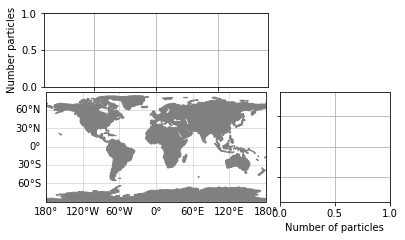

In [234]:
frame = 0
n_day = 360

fig = plt.figure()
gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
# ax.set_extent((-45, 46, -52, -16))
ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax_lon = plt.subplot(gs[0, 0], sharex=ax)
ax_lon.grid()
ax_lon.set_xticklabels([])
ax_lon.set_ylabel('Number particles')
# ax_lon.set_ylim(-5000, 0)

ax_lat = plt.subplot(gs[1, 1], sharey=ax)
ax_lat.grid()
ax_lat.set_yticklabels([])
ax_lat.set_xlabel('Number of particles')


ax_void = plt.subplot(gs[0, 1], sharey=ax)
ax_void.axis('off')


size_point = 0.7
frame = -1

frag_times = [5000, 2500, 500]

colormap='tab10'
x_colors = np.linspace(0, 0.4, len(frag_times))
colors = cm.get_cmap(colormap)(x_colors)

for i, ft in enumerate(frag_times):
    print(i, ft)
    suf = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_15/set15_{ft}.zarr/')
#     suf = sim.where(sim.diameter < 1e-6, drop=True)
    
    xmin = suf['lon'][:,-1].dropna(dim='traj').min().values
    xmax = suf['lon'][:,-1].dropna(dim='traj').max().values
    ymin = suf['lat'][:,-1].dropna(dim='traj').min().values
    ymax = suf['lat'][:,-1].dropna(dim='traj').max().values
    x_range = np.linspace(xmin, xmax, 500)
    y_range = np.linspace(ymin, ymax, 500)
    
    kernel_lon = stats.gaussian_kde(suf['lon'][:,-1].dropna(dim='traj'))
    kernel_lat = stats.gaussian_kde(suf['lat'][:,-1].dropna(dim='traj'))
    
    kde_lon = kernel_lon(x_range)
    kde_lat = kernel_lat(y_range)
    
    n_surf_part = suf['lon'][:,-1].dropna(dim='traj').shape[0]
    
    ax.scatter(suf['lon'][:,frame], suf['lat'][:,frame], color=colors[i], zorder=4, s=2, alpha=0.6)

    ax_lon.plot(x_range, kde_lon, color=colors[i], label=ft)
    ax_lat.plot(kde_lat, y_range, color=colors[i])
    
ax_lon.legend(loc=(1.05, 0.), ncol=2, fontsize=8)

# plt.savefig('../figs/frag_t_Hdist_nano.png', dpi=300)